# File to work in and test few stuff

In [2]:
import numpy as np
import matplotlib.pyplot as plt


n_nucleo = 10
s_nucleo = 15

n_linker = n_nucleo + 1
s_linker = 5

s_shift = 1

def alpha_diffused(
    n_nucleo: int,
    s_nucleo: int,
    n_linker: int,
    s_linker: int,
    s_shift: int,
    alphaf: float,
    alphao: float
) -> np.ndarray :
    """Generate a 1D alpha profile representing a chromatin fiber composed of nucleosomes and linkers,
    with random diffusion (shifts) of linker regions around nucleosomes.

    Args:
        n_nucleo (int): Number of nucleosomes.
        s_nucleo (int): Size (in base pairs) of each nucleosome.
        n_linker (int): Number of linker regions (typically n_nucleo - 1).
        s_linker (int): Size (in base pairs) of each linker region.
        s_shift (int): Maximum extent (in bp) of the fuzzy linker region on each side of a nucleosome.
                       Must satisfy s_shift ≤ s_linker // 2 to prevent overlapping.
        alphaf (float): Alpha value assigned to fuzzy (linker) regions.
        alphao (float): Alpha value assigned to ordered (nucleosome) regions.

    Returns:
        np.ndarray | None: The resulting 1D alpha profile, or None if the given s_shift is too large.
    
    Notes:
        - The base profile alternates between linker and nucleosome regions with fixed periodicity.
        - Each nucleosome is randomly assigned a side (left or right) where additional linker fuzziness is applied.
        - The final profile is plotted: initial in blue, diffused in red.
    """
    
    if s_shift > s_linker // 2:
        print("No such s_shift value permitted because of possible entanglement")
        return None

    # Random shifts: -1 (right) or 1 (left) for each nucleosome
    # Construct the initial periodic alpha profile
    shifts = np.random.choice([-1, 1], size=n_nucleo, p=[0.5, 0.5])
    s_period = s_linker + s_nucleo
    shifted = np.array(
        (s_linker * [alphaf] + s_nucleo * [alphao]) * n_nucleo + s_linker * [alphaf],
        dtype=float
    )

    # Apply diffusion around each nucleosome
    for i in range(n_nucleo):
        nucleo_start = s_linker + i * s_period
        shifted[nucleo_start - s_shift : nucleo_start + s_nucleo + s_shift] = alphao

        if shifts[i] == 1:
            # Fuzzy region to the left
            shifted[nucleo_start - s_shift : nucleo_start + s_shift] = alphaf
        else:
            # Fuzzy region to the right
            shifted[nucleo_start - s_shift + s_nucleo : nucleo_start + s_shift + s_nucleo] = alphaf

    return shifted


alpha_diffused(n_nucleo, s_nucleo, n_linker, s_linker, s_shift, 1, 0)

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1.])

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1' # prevent multithreading

from tqdm.auto import tqdm
from multiprocessing import Pool

import numpy as np
from scipy import optimize, linalg
from matplotlib import pyplot as plt



# The implementation we are using is not particularly efficient; so let's speed things up by parallelization
N_traj = 10 # the more the better (but longer runtime)
with Pool() as mypool:
    imap = mypool.imap_unordered(run_recoil, np.random.randint(1<<31, size=N_traj))
    imap = tqdm(imap, total=N_traj)
    trajectories = np.array(list(imap))

# os.environ['OMP_NUM_THREADS'] = '1' # prevent multithreading

# from tqdm.auto import tqdm
# from multiprocessing import Pool
# from scipy import optimize, linalg
# from matplotlib import pyplot as plt

plt.rcParams['font.size'] = 8


plt.rcParams['font.size'] = 8    


# ctrl a pour selectionnet toute une cellule d'un coup
# ctrl shift pour passer de fenetre en fenetre
# alt flèches haut bas gauche droite

In [24]:
import numpy as np

x = np.array([[0, 3, 0, 5, 0, 2, 2, 7, 2, 5, 5],
              [0, 5, 5, 7, 7, 9, 7, np.nan, np.nan, np.nan, np.nan],
              [0, 4, 4, 7, 4, 9, 4, 7, 7, np.nan, np.nan]])

tc = np.array([[0, 0.22, 0.31, 0.47, 1.20, 1.25, 3.21, 3.56, 4.55, 5.12, 6.12],
              [0, 0.45, 0.55, 0.88, 2.22, 3.12, 3.55, np.nan, np.nan, np.nan, np.nan],
              [0, 0.12, 0.44, 0.76, 0.79, 2.13, 2.55, 4.17, 5.13, np.nan, np.nan]])

t = np.diff(tc, axis=1)

print(x, "\n\n", tc, "\n\n", t)

[[ 0.  3.  0.  5.  0.  2.  2.  7.  2.  5.  5.]
 [ 0.  5.  5.  7.  7.  9.  7. nan nan nan nan]
 [ 0.  4.  4.  7.  4.  9.  4.  7.  7. nan nan]] 

 [[0.   0.22 0.31 0.47 1.2  1.25 3.21 3.56 4.55 5.12 6.12]
 [0.   0.45 0.55 0.88 2.22 3.12 3.55  nan  nan  nan  nan]
 [0.   0.12 0.44 0.76 0.79 2.13 2.55 4.17 5.13  nan  nan]] 

 [[0.22 0.09 0.16 0.73 0.05 1.96 0.35 0.99 0.57 1.  ]
 [0.45 0.1  0.33 1.34 0.9  0.43  nan  nan  nan  nan]
 [0.12 0.32 0.32 0.03 1.34 0.42 1.62 0.96  nan  nan]]


In [25]:
# Forward step dwell times were measured as the time between two consecutive forward steps
# Reverse step dwell times were measured as the time between a reverse step and the preceding forward step

# C'est exactement ce que je dois coder aujourd'hui

In [26]:
# # Forward jumps
# mask_forward = np.zeros_like(x, dtype=bool)
# for i in range(len(x)):
#     for j in range (len(x[i])-1):
#         if x[i][j] == x[i][j+1]:
#             # mask[i][j] = True
#             mask_forward[i][j+1] = 1
# print(mask_forward)

# # Reverse jumps
# mask_reverse = np.zeros_like(x, dtype=bool)
# for i in range(len(x)):
#     for j in range (len(x[i])-1):
#         if x[i][j] != x[i][j+1]:
#             # mask[i][j] = True
#             mask_reverse[i][j+1] = 1
# print(mask_reverse)

# mask_rever = ~mask_forward
# print(mask_rever)print(array)


In [38]:
from typing import Tuple
import matplotlib.pyplot as plt


def calculate_distribution(
    data: np.ndarray, 
    first_bin: float, 
    last_bin: float, 
    bin_width: float
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Calculate the normalized distribution of data using a histogram.

    Args:
        data (np.ndarray): Array of data values to compute the distribution for.
        first_bin (float): Lower bound of the first bin.
        last_bin (float): Upper bound of the last bin.
        bin_width (float): Width of each bin.

    Returns:
        Tuple[np.ndarray, np.ndarray]:
            - points (np.ndarray): Array of bin centers.
            - distrib (np.ndarray): Normalized distribution (sum equals 1).
    """

    # Handle empty data array
    if data.size == 0: 
        return np.array([]), np.array([])

    # Points and not bins
    bins_array = np.arange(first_bin, int(last_bin) + bin_width, bin_width)
    distrib, bins_edges = np.histogram(data, bins=bins_array)

    # Normalizing without generating NaNs
    if np.sum(distrib) > 0:
        distrib = distrib / np.sum(distrib)
    else:
        distrib = np.zeros_like(distrib)

    points = (bins_edges[:-1] + bins_edges[1:]) / 2

    # Return the bin centers and the normalized distribution
    return points, distrib

In [39]:
def getting_forwards(x_matrix, t_matrix):

    # Rajouter les listoflist in matrix

    mask = np.zeros_like(x_matrix, dtype=bool)
    matches = (x[:, :-1] == x[:, 1:])
    mask[:, 1:] = matches

    array = mask * t_matrix
    result = np.concatenate([
        np.insert(row[(row != 0 ) & ~np.isnan(row)], 0, 0)
        for row in array
    ])

    diff = np.diff(result)
    frwd_times = diff[diff > 0]

    return frwd_times


getting_forwards(x, tc)

array([3.21, 2.91, 0.55, 1.67, 0.44, 4.69])

In [40]:
print(x)
print(tc)
our_times = tc[:, 0::2]
print("\n", our_times, "\n")

mask = np.zeros_like(x, dtype=bool)
matches = (x[:, :-1] == x[:, 1:])
mask[:, 1:] = matches
filter = mask[:, 0::2]
print(filter)

# result = np.concatenate([
#     np.diff([])
# ])

dwell = []

for i in range (len(filter)):
    for j in range(len(filter[0])):
        if filter[i][j] == False:
            false_value = our_times[i][j]
        if filter[i][j] == True:
            dwell.append(our_times[i][j] - false_value)
print(dwell)



[[ 0.  3.  0.  5.  0.  2.  2.  7.  2.  5.  5.]
 [ 0.  5.  5.  7.  7.  9.  7. nan nan nan nan]
 [ 0.  4.  4.  7.  4.  9.  4.  7.  7. nan nan]]
[[0.   0.22 0.31 0.47 1.2  1.25 3.21 3.56 4.55 5.12 6.12]
 [0.   0.45 0.55 0.88 2.22 3.12 3.55  nan  nan  nan  nan]
 [0.   0.12 0.44 0.76 0.79 2.13 2.55 4.17 5.13  nan  nan]]

 [[0.   0.31 1.2  3.21 4.55 6.12]
 [0.   0.55 2.22 3.55  nan  nan]
 [0.   0.44 0.79 2.55 5.13  nan]] 

[[False False False  True False  True]
 [False  True  True False False False]
 [False  True False False  True False]]
[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


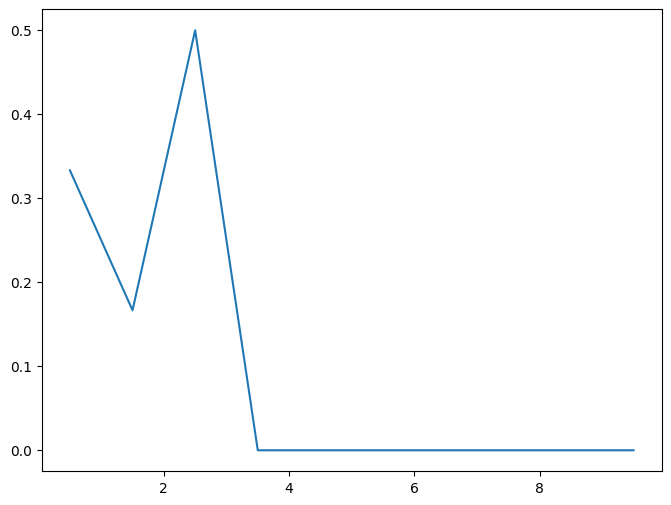

In [41]:
def getting_reverses(t_matrix: np.ndarray, x_matrix: np.ndarray, first_bin: int, last_bin: int, bin_width: float) -> np.ndarray:

    # Rajouter les listoflist in matrix
    times = t_matrix[:, 0::2]

    mask = np.zeros_like(x_matrix, dtype=bool)
    matches = (x[:, :-1] == x[:, 1:])
    mask[:, 1:] = matches
    filter = mask[:, 0::2]

    dwell = []

    for i in range (len(filter)):
        for j in range(len(filter[0])):
            if filter[i][j] == False:
                false_value = times[i][j]
            if filter[i][j] == True:
                dwell.append(times[i][j] - false_value)
    print(dwell)

    points, distrib_reverses = calculate_distribution(np.array(dwell), first_bin, last_bin, bin_width)
    return points, distrib_reverses

x_points, y_points = getting_reverses(tc, x, first_bin=0, last_bin=10, bin_width=1)

plt.figure(figsize=(8,6))
plt.plot(x_points, y_points)
plt.show()

In [32]:
# # Sous forme numpy

# dwell = []
# for row_filter, row_times in zip(filter, our_times):
#     # indices des False
#     false_mask = ~row_filter
#     # dernier False avant chaque position
#     last_false = np.maximum.accumulate(row_times * false_mask)
#     # différences seulement aux True
#     dwell.extend((row_times - last_false)[row_filter])
# print(dwell)

[np.float64(2.01), np.float64(1.5700000000000003), np.float64(0.55), np.float64(2.22), np.float64(0.44), np.float64(2.58)]


In [109]:
# dwell_times = diffs_t[:, 0::2]

# jump_times = diffs_t[:, 1::2]
# print(dwell_times, "\n", jump_times)

In [100]:
mask = np.zeros_like(x, dtype=bool)
equal_next = (x[:, :-1] == x[:, 1:])

mask[:, :-1] |= equal_next
mask[:,  1:] |= equal_next

print(mask)

[[False False False False False  True  True False False  True  True]
 [False  True  True  True  True False False False False False False]
 [False False False False False False False  True  True False False]]


In [ ]:
def find_dwell_times(x_matrix: np.ndarray, t_matrix: np.ndarray):
    tau_forward = 0
    tau_reverse = 0
    return tau_forward, tau_reverse

# .